# Normal Distribution
<hr style="border: 1px solid rgb(243, 82, 104);">

<b>Desiree Valois</b>
<br>Computer Engineer

In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Z-score

In [67]:
df = pd.DataFrame([1, 2, 2, 3, 3, 3, 4, 4, 5], 
                  columns=['Dataset'])
df

,Dataset
0,1
1,2
2,2
3,3
4,3
5,3
6,4
7,4
8,5


In [68]:
df.describe()

,Dataset
count,9.000000
mean,3.000000
std,1.224745
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [69]:
df['Z-Score'] = stats.zscore(df['Dataset'], ddof=1)
df

,Dataset,Z-Score
0,1,-1.632993
1,2,-0.816497
2,2,-0.816497
3,3,0.000000
4,3,0.000000
5,3,0.000000
6,4,0.816497
7,4,0.816497
8,5,1.632993


In [70]:
df['Z-Score'].mean()

np.float64(0.0)

In [71]:
df['Z-Score'].std(ddof=1)

1.0

In [72]:
df = pd.read_csv(r'dataset/current-test.csv',
                delimiter=",",
                index_col='Sample')
df

,Current
Sample,
1,12.0
2,15.0
3,8.3
4,9.7
5,12.0
6,13.9
7,14.1
8,9.2
9,12.4


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Current  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [74]:
df.describe()

,Current
count,30.000000
mean,11.806667
std,3.166629
min,3.300000
25%,10.250000
50%,12.000000
75%,13.775000
max,21.500000


## Z-score - Current

In [75]:
df['Z-Score'] = stats.zscore(df['Current'], ddof=1)
df

,Current,Z-Score
Sample,,
1,12.0,0.061053
2,15.0,1.008433
3,8.3,-1.107382
4,9.7,-0.665271
5,12.0,0.061053
6,13.9,0.661060
7,14.1,0.724219
8,9.2,-0.823168
9,12.4,0.187371


In [76]:
df['Z-Score'].describe()

count    3.000000e+01
mean     7.401487e-18
std      1.000000e+00
min     -2.686348e+00
25%     -4.915848e-01
50%      6.105335e-02
75%      6.215863e-01
max      3.061089e+00
Name: Z-Score, dtype: float64

## Histogram

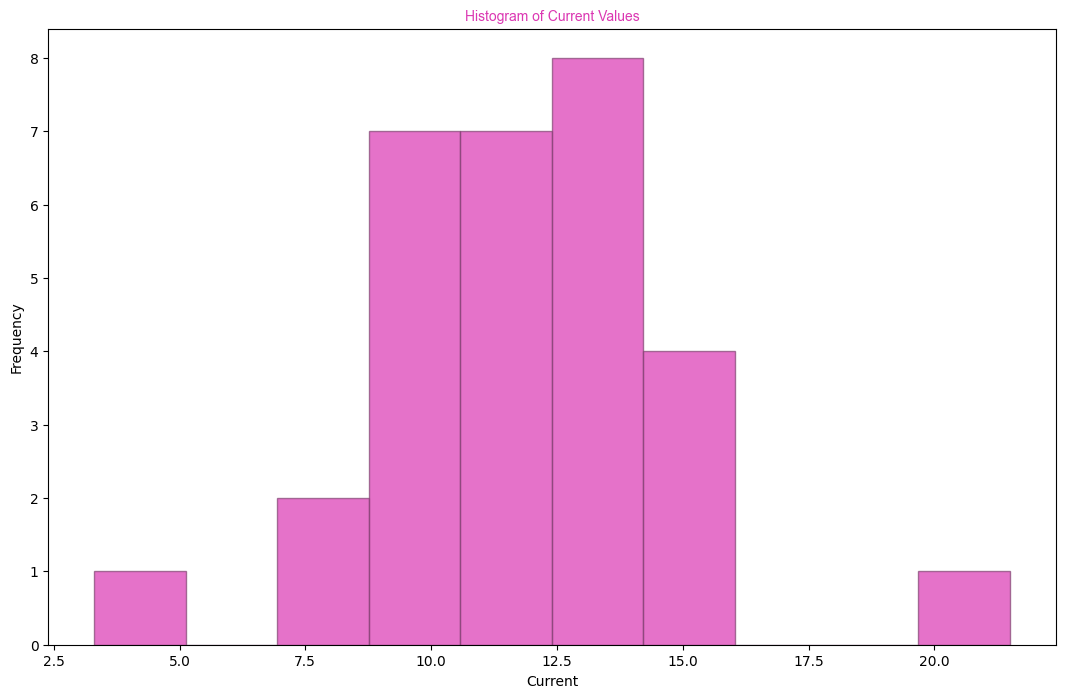

In [94]:
figsize = (13, 8)
plt.figure(figsize=figsize)
plt.hist(df['Current'], bins=10, edgecolor="#814372", alpha=0.7, color="#DB37B2")
plt.title('Histogram of Current Values',
fontsize=14, font='Arial', color="#DB37B2")
plt.xlabel('Current')
plt.ylabel('Frequency')
plt.show()

## Normal Distribution (2)

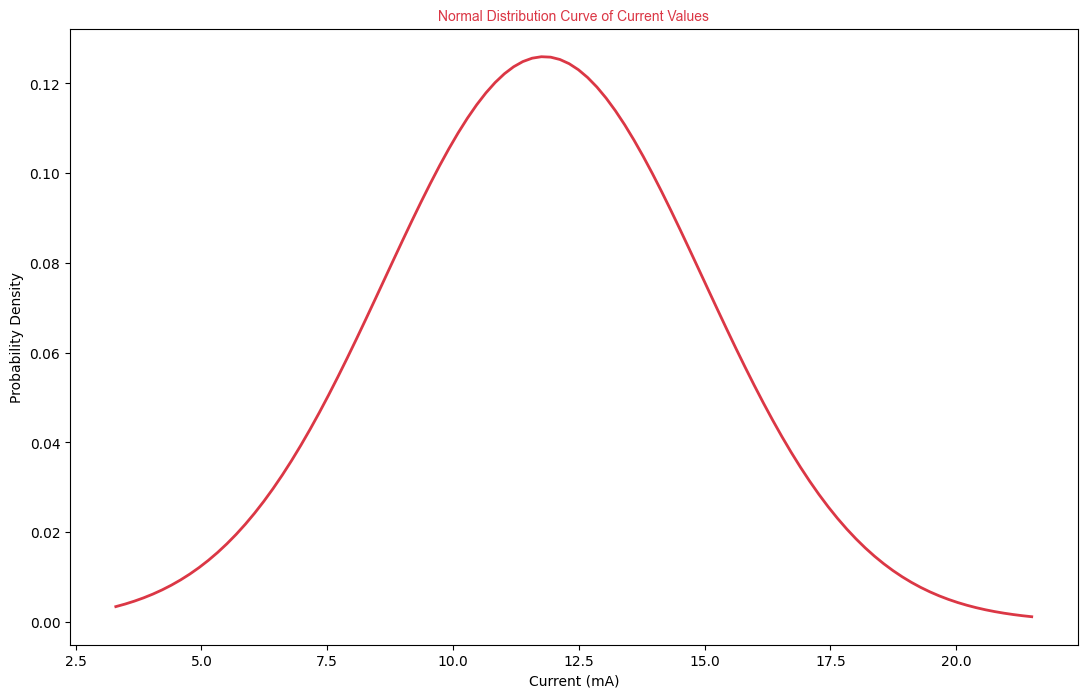

In [99]:
mean = df['Current'].mean()
std = df['Current'].std(ddof=1)

x_min = df['Current'].min()
x_max = df['Current'].max()

x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)

plt.figure(figsize=figsize)
plt.plot(x, p, color="#DB3745", linewidth=2)
plt.title('Normal Distribution Curve of Current Values',
fontsize=14, font='Arial', color="#DB3745")
plt.xlabel('Current (mA)')
plt.ylabel('Probability Density')
plt.show()

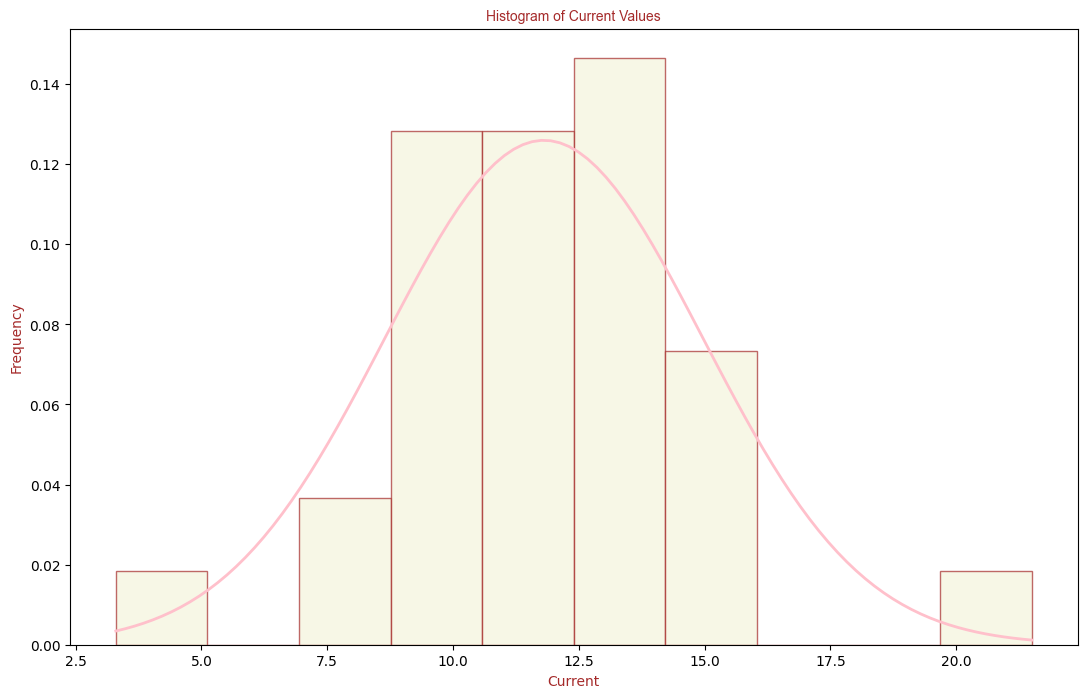

In [100]:

plt.figure(figsize=figsize)
plt.hist(df['Current'], bins=10, edgecolor="brown", 
            density=True, alpha=0.7, color="beige")
plt.title('Histogram of Current Values',
fontsize=14, font='Arial', color="brown")
plt.xlabel('Current', color="brown")
plt.ylabel('Frequency', color="brown")

p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, color="pink", linewidth=2)
plt.show()

## Standard Normal Distribution

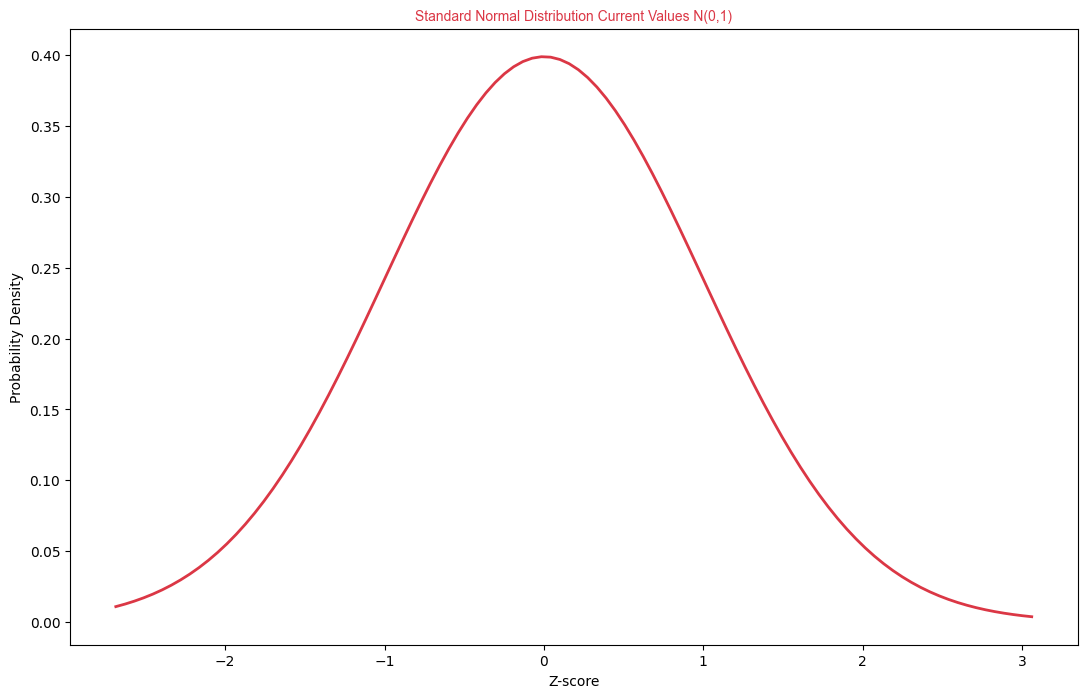

In [92]:
x_min = df['Z-Score'].min()
x_max = df['Z-Score'].max()

x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, df['Z-Score'].mean(), df['Z-Score'].std(ddof=1))

plt.figure(figsize=figsize)
plt.plot(x, p, color="#DB3745", linewidth=2)
plt.title('Standard Normal Distribution Current Values N(0,1)',
          fontsize=14, font='Arial', color="#DB3745")
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.show()
